# House Price Prediction - Capstone Project  

## Introduction  
This project aims to predict house sale prices using various regression models.  
We analyze a dataset of housing features to identify key predictors of price.  

### Objectives:
- Compare multiple linear regression models (OLS, Ridge, Lasso).
- Compare multiple non linear regression models (Random Forest, Gradient Boosting, SVM).
- Optimize the best-performing model through hyperparameter tuning.
- Identify the most important features influencing house prices.


In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import scipy.stats as stats
import sklearn


In [13]:
# Load dataset
file_path = "/Users/andreapena/Desktop/regression_capstone/data/train.csv"
df = pd.read_csv(file_path)

# Check out dataset.
df.set_index("Id", inplace=True)
print(df.head())


    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ... 

In [15]:
# Feature to look at the amount of rows and columns
df.shape


(1460, 80)

In [17]:
# Check column names
df.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [21]:
# Feature Descriptions table
data = {
    "Name": ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
    "Description": [
        "Identifies the type of dwelling involved in the sale",
        "Identifies the general zoning classification of the sale", 
        "Linear feet of street connected to property",
        "Lot size in square feet", "Type of road access to property",
        "Type of alley access to property", "General shape of property",
        "Flatness of the property", "Type of utilities available", 
        "Lot configuration", "Slope of property", "Physical locations within Ames city limits",
        "Proximity to various conditions", "Proximity to various conditions (if more than one is present)",
        "Type of dwelling", "Style of dwelling", "Rates the overall material and finish of the house",
        "Rates the overall condition of the house", "Original construction date", 
        "Remodel date (same as construction date if no remodeling or additions)",
        "Type of roof", "Roof material", "Exterior covering on house", 
        "Exterior covering on house (if more than one material)",
        "Masonry veneer type", "Masonry veneer area in square feet",
        "Evaluates the quality of the material on the exterior",
        "Evaluates the present condition of the material on the exterior",
        "Type of foundation", "Evaluates the height of the basement",
        "Evaluates the general condition of the basement",
        "Refers to walkout or garden level walls", "Rating of basement finished area",
        "Type 1 finished square feet", "Rating of basement finished area (if multiple types)",
        "Type 2 finished square feet", "Unfinished square feet of basement area", 
        "Total square feet of basement area", "Type of heating", "Heating quality and condition",
        "Central air conditioning", "Electrical system", "First Floor square feet",
        "Second floor square feet", "Low quality finished square feet (all floors)",
        "Above grade (ground) living area square feet", "Basement full bathrooms", 
        "Basement half bathrooms", "Full bathrooms above grade", "Half baths above grade", 
        "Bedrooms above grade (does NOT include basement bedrooms)", "Kitchens above grade",
        "Kitchen quality", "Total rooms above grade (does not include bathrooms)",
        "Home functionality (Assume typical unless deductions are warranted)",
        "Number of fireplaces", "Fireplace quality", "Garage location", "Year garage was built", 
        "Interior finish of the garage", "Size of garage in car capacity", "Size of garage in square feet", 
        "Garage quality", "Garage condition", "Paved driveway", "Wood deck area in square feet",
        "Open porch area in square feet", "Enclosed porch area in square feet", "Three season porch area in square feet",
        "Screen porch area in square feet", "Pool area in square feet", "Pool quality", "Fence quality", 
        "Miscellaneous feature not covered in other categories", "$Value of miscellaneous feature", 
        "Month Sold (MM)", "Year Sold (YYYY)", "Type of sale", "Condition of sale"
    ]}

df_reference = pd.DataFrame(data)
display(df_reference)


,Name,Description
0,MSSubClass,Identifies the type of dwelling involved in th...
1,MSZoning,Identifies the general zoning classification o...
2,LotFrontage,Linear feet of street connected to property
3,LotArea,Lot size in square feet
4,Street,Type of road access to property
...,...,...
74,MiscVal,$Value of miscellaneous feature
75,MoSold,Month Sold (MM)
76,YrSold,Year Sold (YYYY)
77,SaleType,Type of sale


Features Descriptions Table:
This table was adapted from Kaggle Dataset. Credits to the original author, @anibalsanchez.

In [23]:
# Check data feature columns, count and dtypes.
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [25]:
# Check null values
df.isnull().sum().sort_values(ascending=False)


PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

In [27]:
# Check percentage of null values
df.isnull().sum().sort_values(ascending=False) / len(df)


PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
MasVnrType     0.597260
                 ...   
Heating        0.000000
HeatingQC      0.000000
MSZoning       0.000000
1stFlrSF       0.000000
SalePrice      0.000000
Length: 80, dtype: float64

In [29]:
# Check duplicate values
df[df.duplicated()]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


In [31]:
# Fill numerical NaNs with median
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)


In [33]:
# Fill categorical NaNs with the mode 
categorical_columns = df.select_dtypes(exclude=['number']).columns
for col in categorical_columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
    

/var/folders/6r/mcwbbx4n1z9gks_6whyvn5tr0000gn/T/ipykernel_37221/3473100654.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [35]:
# Check if there are any missing values in numeric columns
df.select_dtypes(include='number').isna().sum()


MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [37]:
# Check summary statistics
pd.set_option('display.max_columns', None)
print(df.describe())


        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315   
std      30.202904     20.645407   180.731373   456.098091   161.319273   
min    1872.000

Notes: 

LotArea - extreme values between the min and max. Some houses have larger lots than others. 

GrLivArea - extreme values between the min and max. Some houses have larger ground living area than others; high variance. 

TotalBsmtSF - extreme values between the min and max. Some houses have no total basement square footage; hish variance. 

1stFlSF -extreme values between the min and max. Some houses have larger first floor square footage than others; hish variance. 


In [40]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numerical_df.corr()
strong_corr = corr_matrix[abs(corr_matrix) > 0.5] #keep correlation greater than 0.5 and less than 0.5

# Display the correlation matrix
print(strong_corr)


               MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
MSSubClass            1.0          NaN      NaN          NaN          NaN   
LotFrontage           NaN          1.0      NaN          NaN          NaN   
LotArea               NaN          NaN      1.0          NaN          NaN   
OverallQual           NaN          NaN      NaN     1.000000          NaN   
OverallCond           NaN          NaN      NaN          NaN          1.0   
YearBuilt             NaN          NaN      NaN     0.572323          NaN   
YearRemodAdd          NaN          NaN      NaN     0.550684          NaN   
MasVnrArea            NaN          NaN      NaN          NaN          NaN   
BsmtFinSF1            NaN          NaN      NaN          NaN          NaN   
BsmtFinSF2            NaN          NaN      NaN          NaN          NaN   
BsmtUnfSF             NaN          NaN      NaN          NaN          NaN   
TotalBsmtSF           NaN          NaN      NaN     0.537808          NaN   

Notes: 
Focus on strong relationships 

Columns > 0.5: TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGr, GarageCars, GarageArea

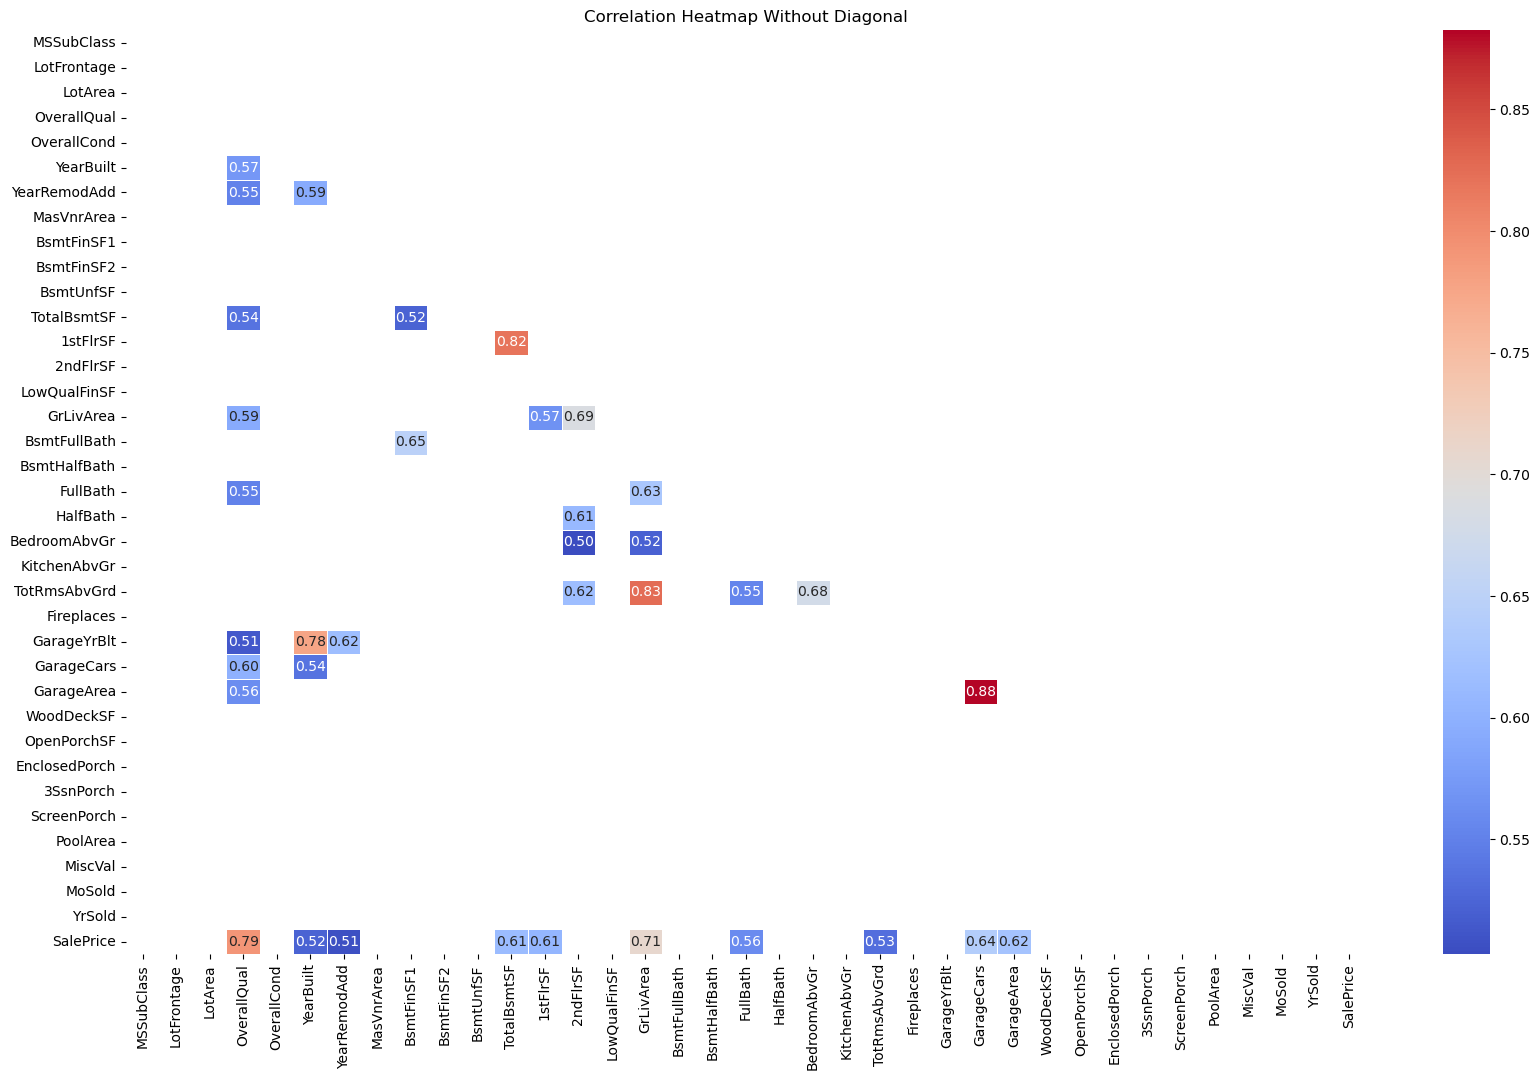

In [42]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(strong_corr, dtype=bool))

# Create the heatmap with the mask
plt.figure(figsize=(20, 12))
sns.heatmap(strong_corr, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap Without Diagonal")

plt.show()


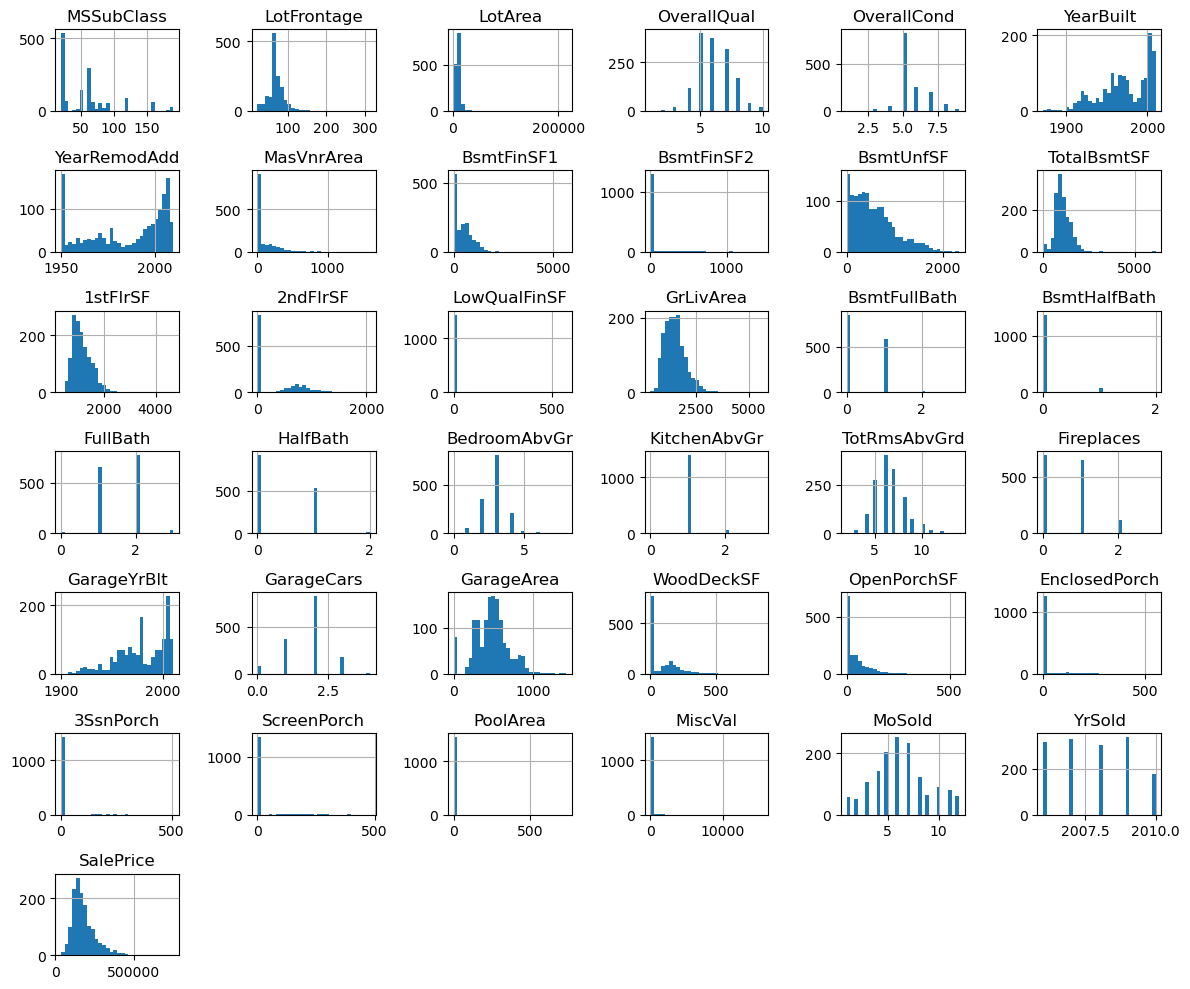

In [44]:
# Histogram of all features
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()


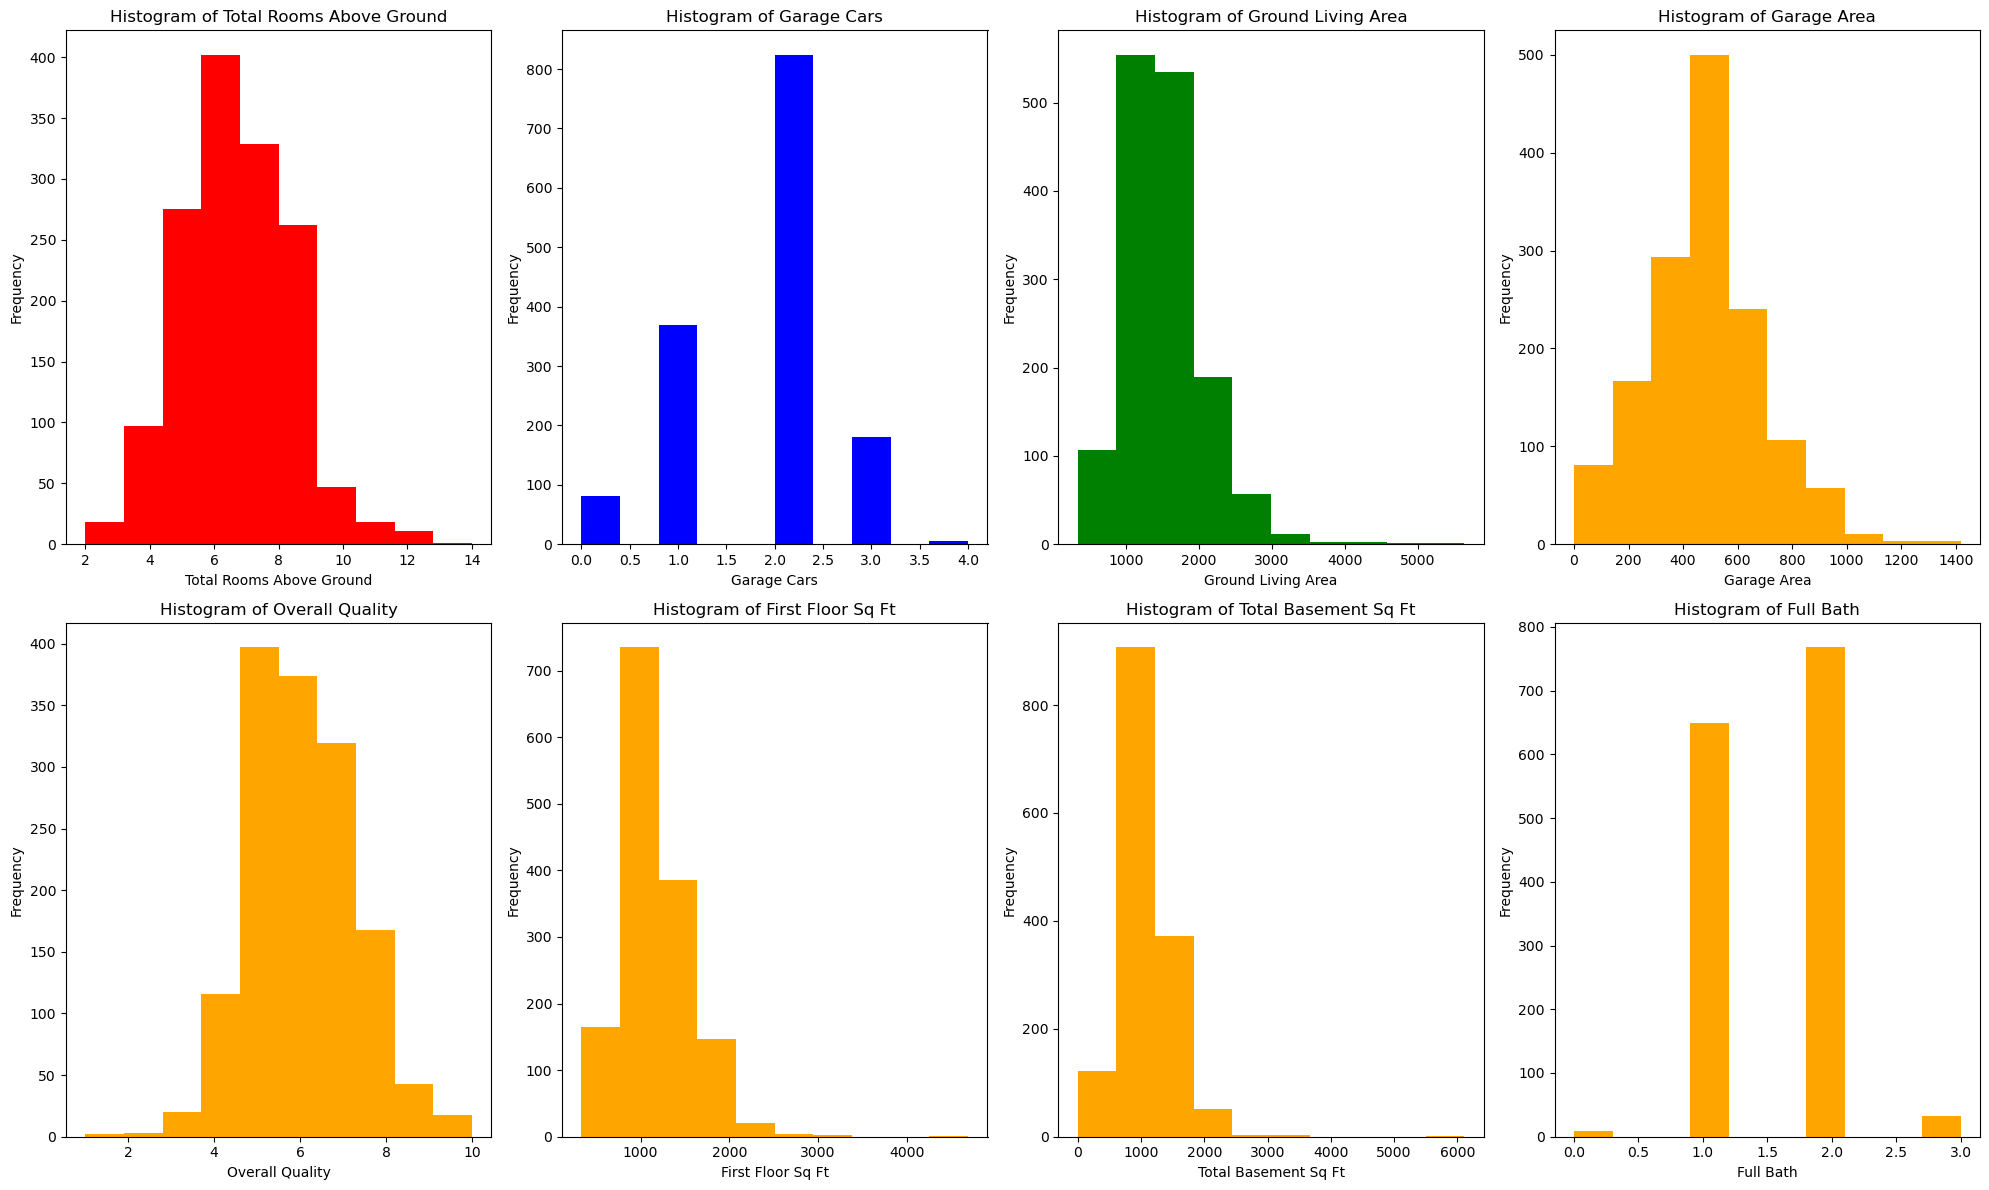

In [291]:
# Histograms of dependent variables.
plt.figure(figsize=(20, 12))
           
plt.subplot(2, 4, 1)
plt.hist(df['TotRmsAbvGrd'], bins=10, color='red')
plt.xlabel('Total Rooms Above Ground')
plt.ylabel('Frequency')
plt.title('Histogram of Total Rooms Above Ground')

plt.subplot(2, 4, 2)
plt.hist(df.GarageCars, bins=10, color='blue')
plt.xlabel('Garage Cars')
plt.ylabel('Frequency')
plt.title('Histogram of Garage Cars')

plt.subplot(2, 4, 3)
plt.hist(df.GrLivArea, bins=10, color='green')
plt.xlabel('Ground Living Area')
plt.ylabel('Frequency')
plt.title('Histogram of Ground Living Area')

plt.subplot(2, 4, 4)
plt.hist(df.GarageArea, bins=10, color='orange')
plt.xlabel('Garage Area')
plt.ylabel('Frequency')
plt.title('Histogram of Garage Area')

plt.subplot(2, 4, 5)
plt.hist(df.OverallQual, bins=10, color='orange')
plt.xlabel('Overall Quality')
plt.ylabel('Frequency')
plt.title('Histogram of Overall Quality')

plt.subplot(2, 4, 6)
plt.hist(df['1stFlrSF'], bins=10, color='orange')
plt.xlabel('First Floor Sq Ft')
plt.ylabel('Frequency')
plt.title('Histogram of First Floor Sq Ft')

plt.subplot(2, 4, 7)
plt.hist(df.TotalBsmtSF, bins=10, color='orange')
plt.xlabel('Total Basement Sq Ft')
plt.ylabel('Frequency')
plt.title('Histogram of Total Basement Sq Ft')

plt.subplot(2, 4, 8)
plt.hist(df.FullBath, bins=10, color='orange')
plt.xlabel('Full Bath')
plt.ylabel('Frequency')
plt.title('Histogram of Full Bath')

plt.tight_layout()
plt.show()


Notes: 
Normal distribution: TotRmsAbvGr, GarageArea, OverallQual
Right skewed: GrLivArea, 1stFlSF, TotBsmtSF

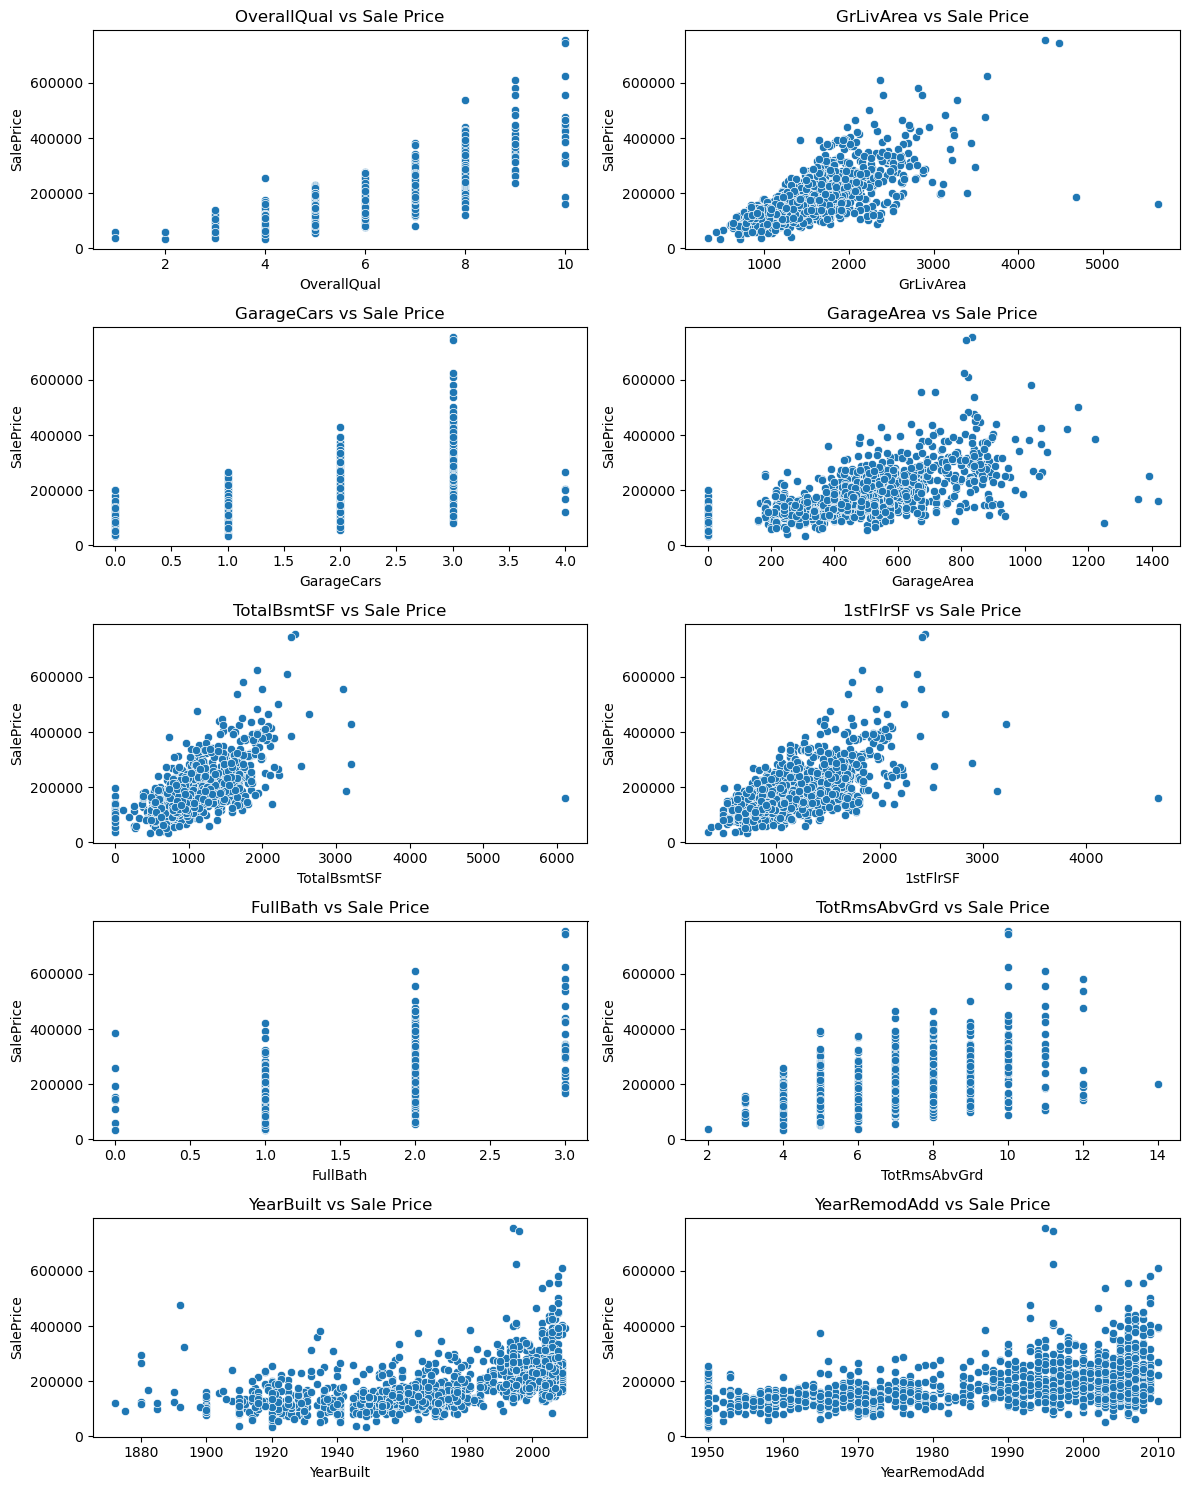

In [46]:
# Select only numeric columns for scatterplots
numeric_df = df.select_dtypes(include=["number"])

# Compute the 10 most correlated numeric features with SalePrice
top_features = numeric_df.corr()["SalePrice"].abs().sort_values(ascending=False).index[1:11]

# Create scatterplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    sns.scatterplot(x=df[feature], y=df["SalePrice"], ax=axes[i])
    axes[i].set_title(f"{feature} vs Sale Price")

plt.tight_layout()
plt.show()


Notes:

Postive correlation with some outliers - GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF

Categorical in terms of semantics(discrete variables) - OverallQual, GarageCars, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd


/var/folders/6r/mcwbbx4n1z9gks_6whyvn5tr0000gn/T/ipykernel_37221/1618172074.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df[feature], y=df["SalePrice"], ax=axes[i], ci=None)  # ci=None removes confidence intervals
/var/folders/6r/mcwbbx4n1z9gks_6whyvn5tr0000gn/T/ipykernel_37221/1618172074.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df[feature], y=df["SalePrice"], ax=axes[i], ci=None)  # ci=None removes confidence intervals
/var/folders/6r/mcwbbx4n1z9gks_6whyvn5tr0000gn/T/ipykernel_37221/1618172074.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df[feature], y=df["SalePrice"], ax=axes[i], ci=None)  # ci=None removes confidence intervals
/var/folders/6r/mcwbbx4n1z9gks_6whyvn5tr0000gn/T/ipykernel_37221/1618172074.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=N

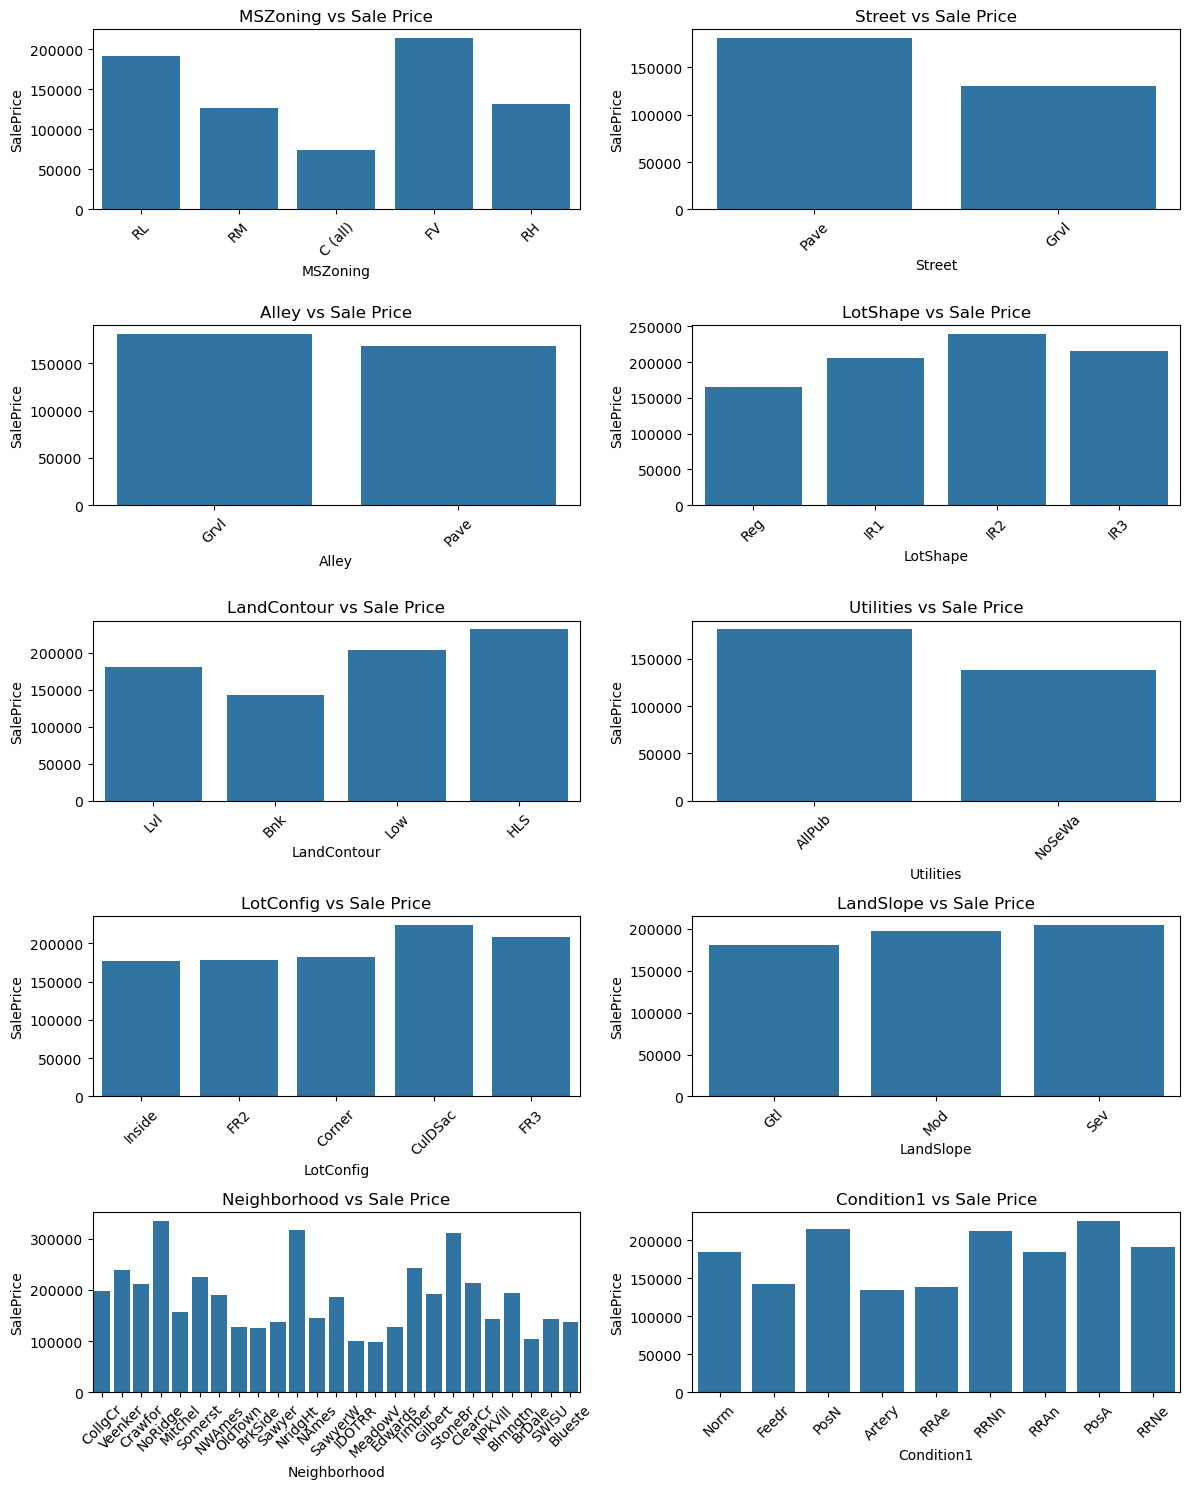

In [48]:
# Select only categorical columns for barplots
categorical_features = df.select_dtypes(exclude=["number"]).columns[:10]  

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.barplot(x=df[feature], y=df["SalePrice"], ax=axes[i], ci=None)  # ci=None removes confidence intervals
    axes[i].set_title(f"{feature} vs Sale Price")
    axes[i].tick_params(axis="x", rotation=45)  

plt.tight_layout()
plt.show()


Notes: Most categorical variables look similiar with no significant difference. 

Refined Hypothesis:

H_0 = "None of the independent variables have a signifcant relationship with Sale Price."

H_1 =  "At least one independent variable has a significant relationship with Sale Price."

In [50]:
# Select only numeric columns before computing correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute Pearson correlation for all numeric features
correlation_matrix = numeric_df.corr()

# Extract correlation values with the target variable
target_corr = correlation_matrix['SalePrice'].drop('SalePrice')

# Sort by absolute correlation values and get the top 10
top_10_features = target_corr.abs().sort_values(ascending=False).head(10)

# Display results
print(top_10_features)


OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [52]:
from scipy.stats import pearsonr

# Convert top_10_features to a list of column names
top_10_features_list = top_10_features.index.tolist()

# Create a dictionary to store results
correlation_results = {}

for feature in top_10_features_list:
    # Drop NaN values for this feature and target
    df_clean = df[[feature, 'SalePrice']].dropna()

    # Compute Pearson correlation
    x = df_clean[feature]
    y = df_clean['SalePrice']

    if len(x) > 1:  
        r, p_value = pearsonr(x, y)
        correlation_results[feature] = (r, p_value)

# Print results
for feature, (r, p_value) in correlation_results.items():
    print(f"{feature}: Pearson r = {r:.2f}, P-value = {p_value:.3f}")


OverallQual: Pearson r = 0.79, P-value = 0.000
GrLivArea: Pearson r = 0.71, P-value = 0.000
GarageCars: Pearson r = 0.64, P-value = 0.000
GarageArea: Pearson r = 0.62, P-value = 0.000
TotalBsmtSF: Pearson r = 0.61, P-value = 0.000
1stFlrSF: Pearson r = 0.61, P-value = 0.000
FullBath: Pearson r = 0.56, P-value = 0.000
TotRmsAbvGrd: Pearson r = 0.53, P-value = 0.000
YearBuilt: Pearson r = 0.52, P-value = 0.000
YearRemodAdd: Pearson r = 0.51, P-value = 0.000


Notes:

OverallQual: 0.79 -	Strong positive correlation(better quality homes sell for higher prices)

GrLivArea: 0.71 - Strong positive correlation(bigger homes (above ground living area) sell for higher prices)

GarageCars: 0.64 - Positive correlation(homes with more garage space are worth more)

TotalBsmtSF: 0.61 - Positive correlation(homes with more total basement sq footage are worth more)

1stFlrSF: 0.61 - Positive correlation(homes with more first floor sq footage are worth more)

ExterQual_TA: -0.59 - Negative correlation(External quality rating is associated with lower sale prices)

FullBath: 0.56 - Moderate positive correlation(Full bath tend to sell for more)

TotRmsAbvGrd: 0.53 - Moderate positive correlation(Total rooms above ground tend to sell for more) 

YearBuilt: 0.52 - Moderate positive correlation(Newer houses tend to sell for more)

All P-values = 0.000,these relationships are statistically significant.

In [54]:
# Create dummy variables for categorical features
df = pd.get_dummies(df, drop_first=True) 

print(df.columns)


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=245)


In [56]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df.drop('SalePrice', axis=1)  
y = df['SalePrice']  

# Split into 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


In [58]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)


In [60]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Linear model comparisons
# Define models
models = {
    "OLS": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1), 
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return rmse

# Store results
results = {}

for name, model in models.items():
    rmse = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[name] = {"RMSE": rmse}

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)


                RMSE
OLS    342991.389678
Ridge   43266.164369
Lasso   34262.049316


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.454e+11, tolerance: 7.602e+08
  model = cd_fast.enet_coordinate_descent(


Notes:  

Evaluation metrics - RMSE because it measures prediction error, and gives more weight to larger errors. 

Best model - Lasso becasue it is lower(smaller errors).

In [63]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model 
rf_model = RandomForestRegressor(random_state=1234, n_jobs=-1)

# Train the model 
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"RMSE: {rmse:.2f}")


RMSE: 27245.97


Notes: Random Forest is a better model than Lasso.

In [65]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning with GridSearch for nonlinear model
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Min samples needed to split a node
    'min_samples_leaf': [1, 2, 4]     # Min samples needed to be a leaf
}

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=123, n_jobs=-1)

# Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

 # Best Model
best_rf = grid_search.best_estimator_

# Evaluate the optimized model
y_pred = best_rf.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5 

print(f"Optimized Random Forest RMSE: {rmse:.2f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Optimized Random Forest RMSE: 27173.45


Notes:
Optimized RF performed slightly better than orginal RF. 

In [349]:
#Train vs. test scores of optimized model

def evaluate_model_rmse(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Compute only RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    return train_rmse, test_rmse
    
rmse_results = {}

# Evaluate Random Forest 
train_rmse_rf, test_rmse_rf = evaluate_model_rmse(best_rf, X_train_scaled, X_test_scaled, y_train, y_test)

# Add RF results
rmse_results["Random Forest"] = {"Train RMSE": train_rmse_rf, "Test RMSE": test_rmse_rf}

# Convert results to DataFrame
rmse_results_df = pd.DataFrame(rmse_results).T
print(rmse_results_df)


                 Train RMSE     Test RMSE
Random Forest  11054.711843  27173.454097


In [357]:
# Modify hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=200,          # More trees
    max_depth=None,            # Limit tree depth (previously None)
    min_samples_split=10,     # More samples needed to split
    min_samples_leaf=10,      # More samples per leaf
    random_state=1234, 
    n_jobs=-1
)

# Train again and evaluate RMSE
rf_model.fit(X_train_scaled, y_train)
y_pred_rf_train = rf_model.predict(X_train_scaled)
y_pred_rf_test = rf_model.predict(X_test_scaled)

train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_pred_rf_train))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))

print(f"Train RMSE: {train_rmse_rf:.2f}, Test RMSE: {test_rmse_rf:.2f}")


Train RMSE: 26085.00, Test RMSE: 28653.73


Notes: 
The gap between train and test scores is smaller than before, but higher test score. This modification to the model makes more generalizable predictions(more reliable for unseen data). 

In [169]:
y_test.describe()

count       292.000000
mean     178491.558219
std       74239.301193
min       34900.000000
25%      130000.000000
50%      165075.000000
75%      212000.000000
max      485000.000000
Name: SalePrice, dtype: float64

Notes:
Relative prediction error = 16.1%. 

This perentage is how large the error is relative to typical home prices. Thus, the model's predicted sale price are off by ~16.1%

In [147]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Non-Linear model comparison 
# Define models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=1234, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=1234),
    "Support Vector Regressor": SVR()
}

# Store results
results = {}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    return train_rmse, test_rmse

# Loop through models and evaluate
for name, model in models.items():
    train_rmse, test_rmse = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[name] = {"Train RMSE": train_rmse, "Test RMSE": test_rmse}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)


                            Train RMSE     Test RMSE
Random Forest             12234.965883  27201.717150
Gradient Boosting          4143.354530  25844.641855
Support Vector Regressor  82822.907896  75754.982789


Notes:
Gradient Boosting - smaller gap and lower test score. 

In [360]:
# Hyperparameter tuning for Gradient Boosting
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Controls step size
    'max_depth': [3, 5, 7],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
}

# Initialize model
gb = GradientBoostingRegressor(random_state=1234)

# Grid search with cross-validation
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Best Model
best_gb = grid_search.best_estimator_

# Evaluate on test data
y_pred_best = best_gb.predict(X_test_scaled)
best_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))

print(f"Optimized Gradient Boosting RMSE: {best_rmse:.2f}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Optimized Gradient Boosting RMSE: 24327.50


Notes:
Optimized GB performed better than original GB. 

In [361]:
# Train vs Test scores in the optimized model 
y_train_pred_gb = best_gb.predict(X_train_scaled)
y_test_pred_gb = best_gb.predict(X_test_scaled)

# Compute RMSE
train_rmse_gb = np.sqrt(mean_squared_error(y_train, y_train_pred_gb))
test_rmse_gb = np.sqrt(mean_squared_error(y_test, y_test_pred_gb))

# Print the results
print(f"Optimized Gradient Boosting Train RMSE: {train_rmse_gb:.2f}")
print(f"Optimized Gradient Boosting Test RMSE: {test_rmse_gb:.2f}")


Optimized Gradient Boosting Train RMSE: 8782.17
Optimized Gradient Boosting Test RMSE: 24327.50


Notes:
Optimized GB has a smaller gap and lower test score. 

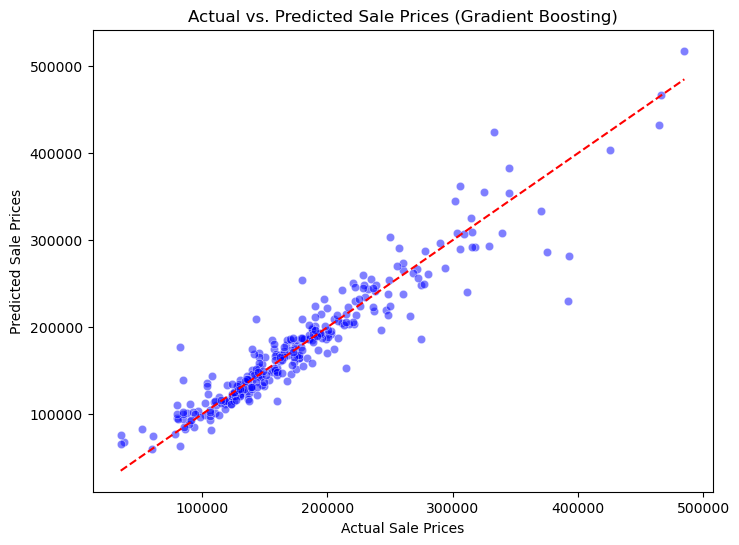

In [411]:
# Predictions
y_pred_gb = best_gb.predict(X_test_scaled)  

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_gb, alpha=0.5, color='blue')  
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Ideal fit line
plt.xlabel("Actual Sale Prices")
plt.ylabel("Predicted Sale Prices")
plt.title("Actual vs. Predicted Sale Prices (Gradient Boosting)")
plt.show()


Notes:

Actual vs. Predicted: Strong alignment with data points close to line with a few outliers, indicates model accuracy.

In [422]:
y_test.describe()

count       292.000000
mean     178491.558219
std       74239.301193
min       34900.000000
25%      130000.000000
50%      165075.000000
75%      212000.000000
max      485000.000000
Name: SalePrice, dtype: float64

Notes:
Relative prediction error = 13.6%

The model's predicted sale prices are off by ~13.6%.

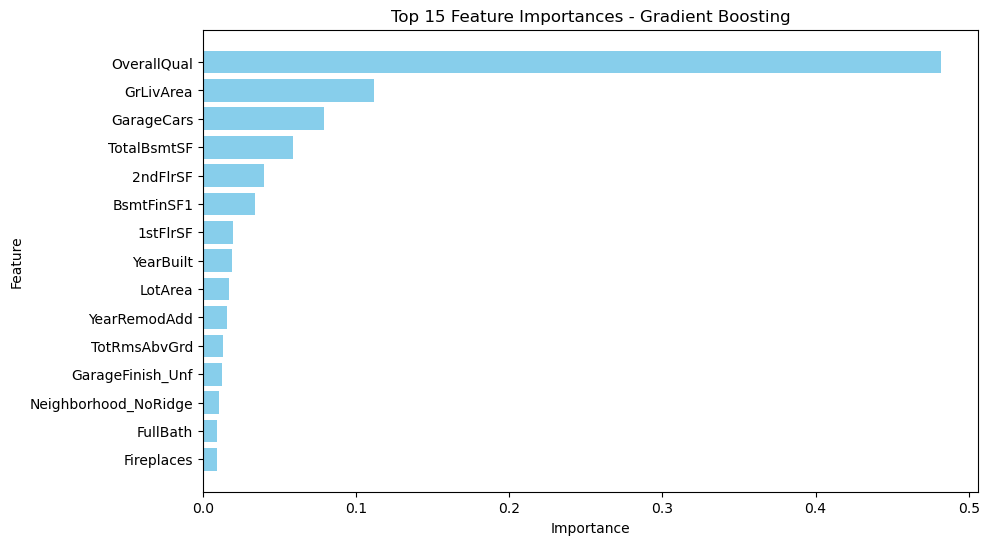

In [424]:
# Sort features by importance
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_gb.feature_importances_})
importance_df = importance_df.sort_values(by="Importance", ascending=False).head(15)  

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 15 Feature Importances - Gradient Boosting")
plt.gca().invert_yaxis()  # Highest importance at top
plt.show()


Notes:

Feature Importance: Top 15 variables affecting house price predictions.

## Conclusion  

After testing multiple models, **Optimized Gradient Boosting** emerged as the best-performing model with an RMSE of **24,327.50** with an average prediction error of 13.6%.  
Key takeaways from this analysis include:  

- **Feature Importance**: The most predictive features were Overall Quality, Ground Living Area, Garage Cars and Total Basement Square Footage.  
- **Overfitting Reduction**: Optimizing Random Forest improved test performance, but Gradient Boosting ultimately provided better generalization.  
- **Future Improvements**: Further tuning, additional features, or ensemble stacking may further improve accuracy.  

This analysis provides a solid foundation for house price predictions, and can be expanded with additional datasets or more advanced techniques.